In [1]:
import pandas as pd

business = pd.read_json('../yelp_dataset/yelp_academic_dataset_business.json', lines=True)
business.shape[0]

# business.head()

160585

In [2]:
business.dropna(inplace=True, subset=['business_id', 'name', 'address', 'latitude', 'longitude', 'stars', 'review_count'])
business.shape[0]

160585

In [3]:
import seaborn as sns
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

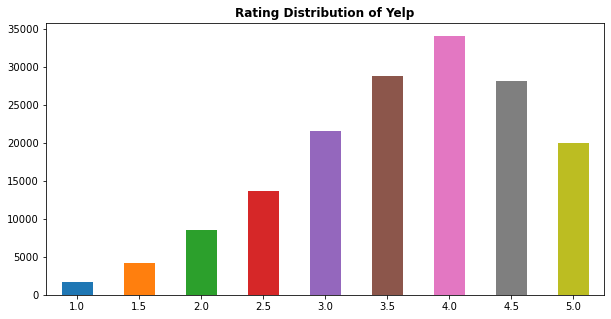

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette()
rating = business['stars'].value_counts()
rating.sort_index(inplace=True)
rating.plot(kind='bar', 
            figsize=(10, 5),
            color=colors[:9],
            rot=0) #字体倾斜角度
plt.title('Rating Distribution of Yelp',fontweight='bold')
plt.show()

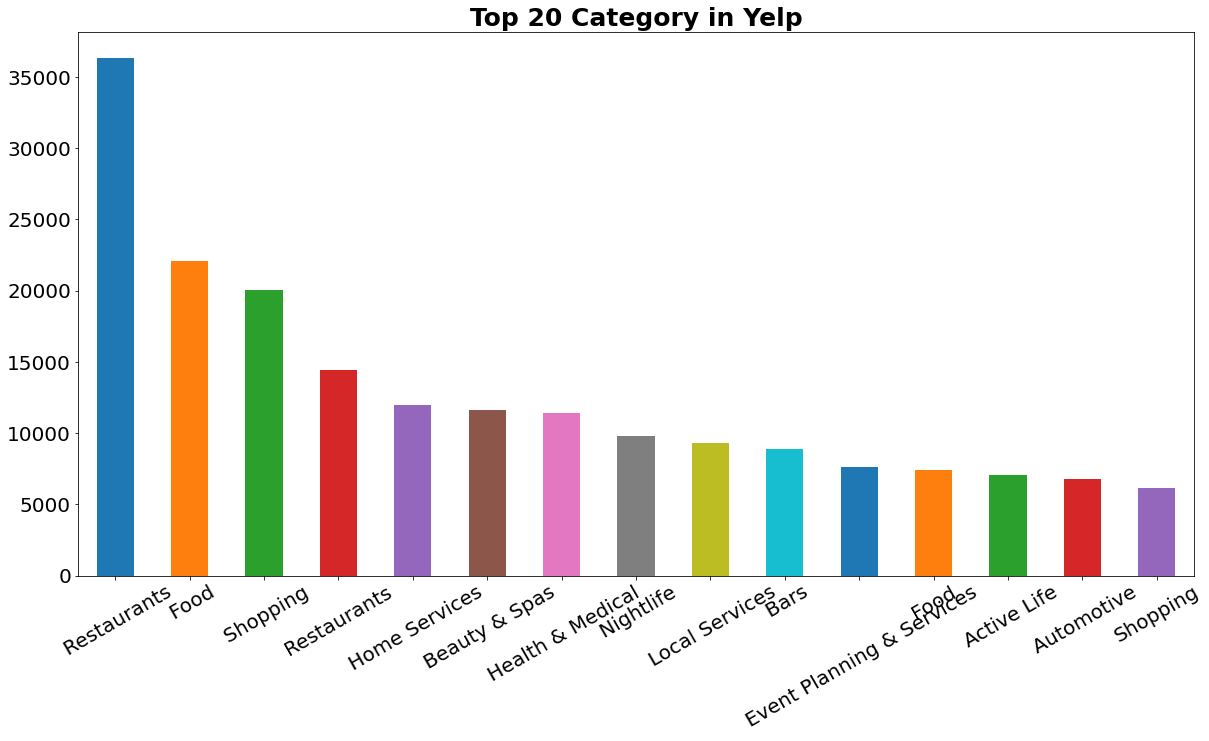

In [5]:
import numpy as np

business['categories'] = business['categories'].apply(lambda x: x if x else ' ')
category_str = ','.join(business['categories'])
category_list = category_str.split(',')
category_df = pd.DataFrame(category_list, columns=['category'])
top15_category = category_df['category'].value_counts()[:15]
top15_category
top15_category.plot(kind='bar',
                    color=colors[:20],
                    figsize=(20, 10), 
                    rot=30,
                    fontsize=20)
plt.title('Top 20 Category in Yelp',
          fontsize=25, 
          fontweight='bold')
plt.show()

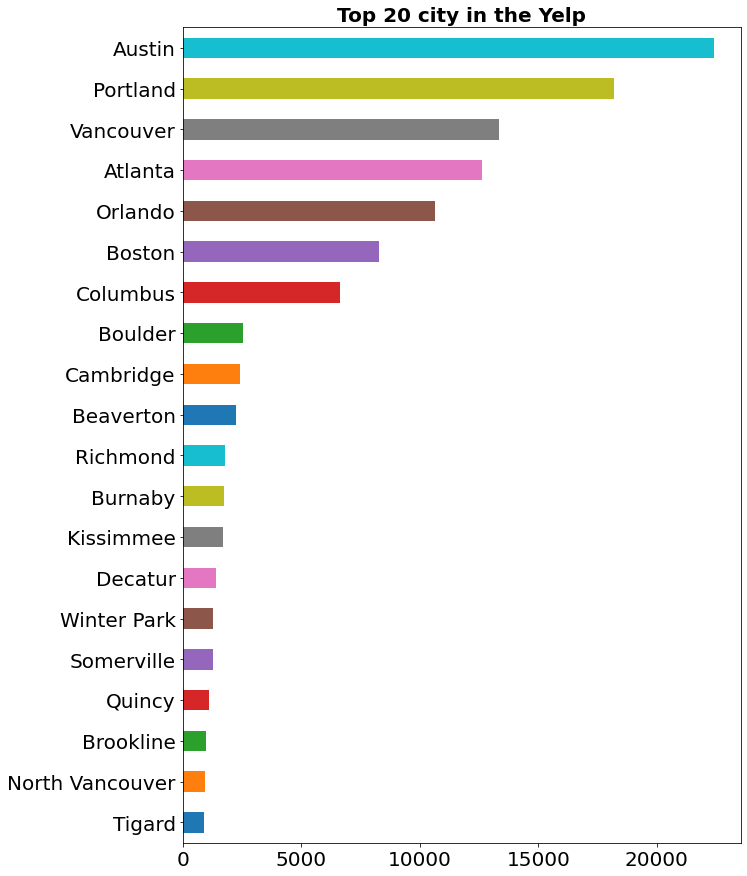

In [6]:
citys = business['city'].value_counts()[:20]
citys.sort_values(ascending=True, inplace=True)#降序，原地修改原始数据
citys.plot(kind='barh',   #水平条形图
           figsize=(10, 15),
           fontsize=20,
           color=colors[:20])
plt.title('Top 20 city in the Yelp', 
          fontsize=20, 
          fontweight='bold')
plt.show()